In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pickle
import operator
from pylab import *
from sklearn.decomposition import PCA

In [ ]:
import sys
sys.path.append("/opt/conda/lib/python3.7/site-packages") ##添加xbg路径
import woe.feature_process as fp
import woe.eval as eval

In [4]:
from time import time
import scipy.stats as stats
import gc

from bayes_opt import BayesianOptimization

from sklearn.model_selection import cross_val_score, StratifiedKFold, StratifiedShuffleSplit, train_test_split, RandomizedSearchCV, PredefinedSplit
from sklearn.metrics import log_loss, matthews_corrcoef, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import contextlib

In [5]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, RocCurveDisplay,auc
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

In [6]:
name = []
for i in range(0,40):
    if i < 10:
        string = "data_721/part-0000"+str(i)+"-0225fca5-6f5a-427f-9f52-9c6180d510e3-c000.csv"
    else:
        string = "data_721/part-000"+str(i)+"-0225fca5-6f5a-427f-9f52-9c6180d510e3-c000.csv"
    name.append(string)

In [7]:
df = pd.concat(
    map(pd.read_csv, name), ignore_index=True)

In [8]:
df['date_wid'] = pd.to_datetime(df['date_wid'])

In [9]:
df.rename(columns={"flag": "target"}, inplace=True)

In [10]:
train=df[(df['class']=="test")&(df['date_wid']>='2023-01-01')&(df['date_wid']<'2023-04-01')]

In [11]:
dt_train = df[(df['class']=="test")&(df['date_wid']>='2023-04-01')&(df['date_wid']<'2023-05-01')]

In [12]:
train=train.drop(['account_code','social_credit_num','created','date_wid','class'], axis=1)

In [13]:
train['lastbuy_date_diff'] = train['lastbuy_date_diff'].fillna(9999)
train = train.fillna(0)

In [14]:
train[['unit_level','act_category','act_alias','ent_level','ent_category']]=train[['unit_level','act_category','act_alias','ent_level','ent_category']].astype(str)

In [15]:
train2 = train.copy()

In [16]:
data_woe = train2 #用于存储所有数据的woe值
civ_list = []
n_positive = sum(train2['target'])
n_negtive = len(train2) - n_positive
for column in list(train2.columns[2:]):
    if train2[column].dtypes == 'object':
        civ = fp.proc_woe_discrete(train2, column, n_positive, n_negtive, 0.05*len(train2), alpha=0.05)
    else:  
        civ = fp.proc_woe_continuous(train2, column, n_positive, n_negtive, 0.05*len(train2), alpha=0.05)
    civ_list.append(civ)
    data_woe[column] = fp.woe_trans(train2[column], civ)

civ_df = eval.eval_feature_detail(civ_list,'train_output.csv')

-------process continuous variable:lastbuy_date_diff--------
-------process continuous variable:thisyear_newsales--------
-------process continuous variable:lastyear_newsales--------
-------process continuous variable:thisyear_newbuycnt-------
-------process continuous variable:lastyear_newbuycnt-------
------------process continuous variable:cir_day-------------
----process continuous variable:register_count_pv_15_pv-----
----process continuous variable:register_count_pv_30_pv-----
----process continuous variable:register_count_pv_60_pv-----
----process continuous variable:register_count_pv_120_pv----
----process continuous variable:register_count_pv_15_uv-----
----process continuous variable:register_count_pv_30_uv-----
----process continuous variable:register_count_pv_60_uv-----
----process continuous variable:register_count_pv_120_uv----
-----process continuous variable:signup_count_pv_15_pv------
-----process continuous variable:signup_count_pv_30_pv------
-----process continuous 

/opt/conda/lib/python3.7/site-packages/woe/feature_process.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = cpvar


------------process discrete variable:management------------
---------process continuous variable:regist_capital---------
------------process discrete variable:unit_level------------
-----------process discrete variable:act_category-----------
------------process discrete variable:act_alias-------------
-----------process discrete variable:ent_category-----------
------------process discrete variable:ent_level-------------
-------------process discrete variable:industry-------------
--------process continuous variable:jkzh_work_15_pv---------
--------process continuous variable:jkzh_work_30_pv---------
--------process continuous variable:jkzh_work_60_pv---------
--------process continuous variable:jkzh_work_120_pv--------
--------process continuous variable:jkzh_work_15_uv---------
--------process continuous variable:jkzh_work_30_uv---------
--------process continuous variable:jkzh_work_60_uv---------
--------process continuous variable:jkzh_work_120_uv--------
--------process continuo

In [19]:
sum(train2['target']==1)/len(train2)

0.10092895508956777

In [17]:
p1 = np.array([True]*100000 + [False]*162487)
p2 = np.array(list(train2['target']==1))
p3 = p1 | p2

In [18]:
train2 = train2.iloc[p3,:]
train2

,customer_wid,target,lastbuy_date_diff,thisyear_newsales,lastyear_newsales,thisyear_newbuycnt,lastyear_newbuycnt,cir_day,register_count_pv_15_pv,register_count_pv_30_pv,...,zps_endtrial_120_pv,zps_endtrial_15_uv,zps_endtrial_30_uv,zps_endtrial_60_uv,zps_endtrial_120_uv,lock_cnt_gtj,jkzh_ab,sgd_ab,zps_ab,jkzh_gjg
0,23233746,0,0.569168,-0.068518,-0.410570,0.236641,-0.418181,-0.630646,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,0.923418,8.890371e-09,-0.375459,0.946822,0.961847
3,23326992,0,0.524311,0.509116,-0.410570,0.236641,-0.418181,-0.630646,1.001938,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,0.923418,8.890371e-09,-0.375459,-0.377916,-0.374256
5,23153460,0,0.831476,0.820612,0.002712,1.282493,-0.060616,1.835276,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,-0.232855,8.890371e-09,-0.375459,-0.377916,-0.374256
7,152153637,0,0.524311,1.446653,-0.410570,1.282493,-0.418181,0.711380,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,0.075394,8.890371e-09,1.083090,0.203839,-0.374256
8,176471075,0,0.310114,0.509116,-0.410570,1.282493,-0.418181,0.278429,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,-0.909402,8.890371e-09,-0.375459,-0.377916,-0.374256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485166,25900732,1,-0.918660,-0.633914,-0.410570,-0.633914,-0.418181,-0.630646,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,-0.907659,8.890371e-09,-0.375459,-0.328416,-0.374256
485193,23232083,1,0.831476,0.403935,-0.410570,1.282493,-0.418181,0.278429,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,0.158090,8.890371e-09,-0.375459,-0.328416,0.079020
485278,23426538,1,0.831476,1.446653,-0.410570,1.282493,-0.418181,1.835276,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,0.923418,8.890371e-09,-0.375459,-0.377916,0.961847
485301,23600051,1,-0.369129,-0.633914,0.653506,-0.633914,1.050400,0.278429,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,0.923418,8.890371e-09,1.083090,0.203839,0.961847


In [28]:
train2.to_csv('721train.csv')

In [122]:
sum(test2['target']==1)/len(test2)

0.05178806221200886

In [20]:
from time import time
import scipy.stats as stats

In [34]:
X_train=train2.drop(['target','customer_wid'],axis=1)
Y_train=train2['target']

In [35]:
#分类器使用 xgboost
clf1 = XGBClassifier()
 
#设定搜索的xgboost参数搜索范围，值搜索XGBoost的主要6个参数
param_dist = {
        'n_estimators':range(100,300,50),
        'max_depth':range(2,10,1),
        'learning_rate':np.linspace(0.01,0.1,10),
        'subsample':np.linspace(0.7,1.0,20),
        'colsample_bytree':np.linspace(0.5,0.98,10),
        'min_child_weight':range(1,5,1)
        }
 
#RandomizedSearchCV参数说明，clf1设置训练的学习器
#param_dist字典类型，放入参数搜索范围
#scoring = 'neg_log_loss'，精度评价方式设定为“neg_log_loss“
#n_iter=300，训练300次，数值越大，获得的参数精度越大，但是搜索时间越长
#n_jobs = -1，使用所有的CPU进行训练，默认为1，使用1个CPU
grid = RandomizedSearchCV(clf1,param_dist,cv = 3,scoring = 'roc_auc',n_iter=15,n_jobs = -1,verbose=2)

In [36]:
#在训练集上训练
grid.fit(X_train,Y_train)
#返回最优的训练器
best_estimator = grid.best_estimator_
print(best_estimator)
#输出最优训练器的精度
print(grid.best_score_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.6066666666666667, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.06000000000000001,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=8,
              max_leaves=0, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
0.8401998460699122


In [ ]:
#pca = PCA()  # 加载PCA算法，设置降维后主成分数目为2
#reduced_x = pca.fit_transform(x) 

In [37]:
######保存
best_estimator.save_model("model_new.ubj")

[CV] END colsample_bytree=0.7133333333333334, learning_rate=0.030000000000000006, max_depth=3, min_child_weight=3, n_estimators=150, subsample=0.7; total time= 1.4min
[CV] END colsample_bytree=0.7133333333333334, learning_rate=0.09000000000000001, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.731578947368421; total time= 1.4min
[CV] END colsample_bytree=0.7133333333333334, learning_rate=0.09000000000000001, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.731578947368421; total time= 1.4min
[CV] END colsample_bytree=0.9266666666666666, learning_rate=0.07, max_depth=2, min_child_weight=1, n_estimators=250, subsample=0.8894736842105263; total time= 1.7min
[CV] END colsample_bytree=0.7666666666666666, learning_rate=0.05000000000000001, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8736842105263158; total time=  50.5s
[CV] END colsample_bytree=0.7666666666666666, learning_rate=0.05000000000000001, max_depth=3, min_child_weight=1, n_estimators

In [21]:
dt_train = df[(df['class']=="test")&(df['date_wid']>='2023-04-01')&(df['date_wid']<'2023-05-01')]

In [22]:
dt_train=dt_train.drop(['account_code','social_credit_num','created','date_wid','class'], axis=1)
dt_train['lastbuy_date_diff'] = dt_train['lastbuy_date_diff'].fillna(9999)
dt_train = dt_train.fillna(0)
dt_train[['unit_level','act_category','act_alias','ent_level','ent_category']]=dt_train[['unit_level','act_category','act_alias','ent_level','ent_category']].astype(str)

In [23]:
dt_train2 = dt_train.copy()
a = dt_train2
i=0
for column in list(dt_train2.columns[2:]):
    a[column]=fp.woe_trans(dt_train2[column], civ_list[i])
    i += 1

In [24]:
dt_train2

,customer_wid,target,lastbuy_date_diff,thisyear_newsales,lastyear_newsales,thisyear_newbuycnt,lastyear_newbuycnt,cir_day,register_count_pv_15_pv,register_count_pv_30_pv,...,zps_endtrial_120_pv,zps_endtrial_15_uv,zps_endtrial_30_uv,zps_endtrial_60_uv,zps_endtrial_120_uv,lock_cnt_gtj,jkzh_ab,sgd_ab,zps_ab,jkzh_gjg
2,23185208,0,0.569168,0.403935,-0.410570,0.236641,-0.418181,-0.630646,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,-0.232855,8.890371e-09,-0.375459,-0.377916,0.079020
10,39065407,0,-0.369129,-0.633914,0.002712,-0.633914,-0.060616,-0.630646,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,-0.232855,8.890371e-09,-0.375459,-0.328416,0.079020
14,23476399,0,-0.369129,-0.633914,0.437992,-0.633914,-0.060616,-0.630646,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,0.158090,8.890371e-09,1.083090,0.946822,-0.374256
16,538795683,0,0.831476,-0.068518,0.002712,0.236641,-0.060616,0.278429,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,-0.232855,8.890371e-09,-0.375459,-0.377916,-0.374256
19,23199395,1,1.065428,1.446653,-0.410570,1.282493,-0.418181,0.711380,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,-0.907659,8.890371e-09,-0.375459,-0.377916,-0.374256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485321,27097726,0,-0.918660,-0.633914,-0.410570,-0.633914,-0.418181,-0.630646,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,-0.909402,8.890371e-09,-0.375459,-0.377916,-0.374256
485323,23398521,0,-0.918660,-0.633914,-0.410570,-0.633914,-0.418181,-0.630646,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,-0.907659,8.890371e-09,-0.375459,-0.328416,0.079020
485333,23521111,0,0.310114,0.403935,0.653506,0.236641,1.050400,0.711380,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,0.923418,8.890371e-09,1.083090,0.946822,-0.374256
485340,38655317,0,-0.369129,-0.633914,0.437992,-0.633914,1.050400,0.278429,-0.033373,-0.031403,...,-0.005933,-0.002441,-0.002003,-0.002961,-0.005933,-0.232855,8.890371e-09,0.289701,0.203839,-0.374256


In [25]:
p1 = np.array([True]*32551 + [False]*52892)
p2 = np.array(list(dt_train2['target']==1))
p3 = p1 | p2
dt_train2 = dt_train2.iloc[p3,:]

In [26]:
sum(dt_train2['target']==1)/len(dt_train2)

0.12386800996151234

In [27]:
dt_train2.to_csv('721dt.csv')

In [50]:
X_dt=dt_train2.drop(['target','customer_wid'],axis=1)
Y_dt=dt_train2['target']
Y_dt_pred = best_estimator.predict_proba(X_dt)
Y_dt_pred_1 = Y_dt_pred[:,1]

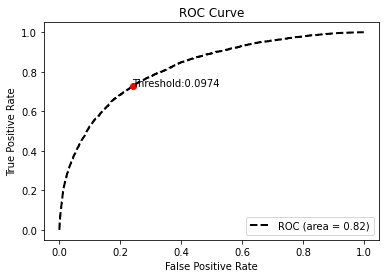

In [51]:
###最佳阈值
def Find_Optimal_Cutoff(TPR, FPR, threshold):
    y = TPR - FPR
    Youden_index = np.argmax(y)  # Only the first occurrence is returned.
    optimal_threshold = threshold[Youden_index]
    point = [FPR[Youden_index], TPR[Youden_index]]
    return optimal_threshold, point

###ROC
fpr, tpr, thersholds = roc_curve(Y_dt, Y_dt_pred_1, pos_label=1)
best_thershold, point = Find_Optimal_Cutoff(tpr, fpr, thersholds)
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.plot(point[0], point[1], marker='o', color='r')
plt.text(point[0], point[1], f'Threshold:{best_thershold:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [52]:
roc_auc

0.8198543235338568

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

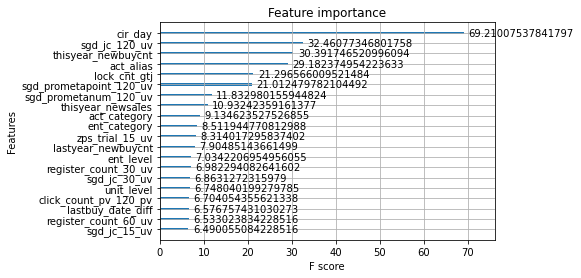

In [69]:
xgb.plot_importance(best_estimator,max_num_features=20,importance_type='gain')

(array([0.7135425 , 0.7135425 , 0.7135425 , 0.86803401, 0.86803401,
        0.92885198, 0.92885198, 0.92885198, 0.92885198, 1.        ]),
 array([-0.63064592, -0.38405371, -0.13746149,  0.10913072,  0.35572293,
         0.60231515,  0.84890736,  1.09549958,  1.34209179,  1.588684  ,
         1.83527622]),
 [<matplotlib.patches.Polygon at 0x7fca3adcde10>])

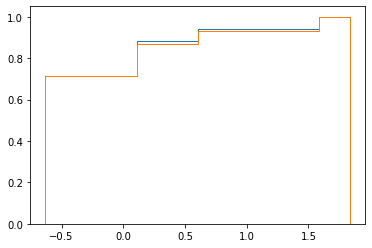

In [81]:
###Cir day
hist(test2['cir_day'],cumulative=True,histtype='step',density=True)
hist(train2['cir_day'],cumulative=True,histtype='step',density=True,label = "7.18")

In [29]:
test = df[(df['class']=="test")&(df['date_wid']=='2023-07-18')]

In [30]:
test=test.drop(['account_code','social_credit_num','created','date_wid','class'], axis=1)
test['lastbuy_date_diff'] = test['lastbuy_date_diff'].fillna(9999)
test = test.fillna(0)

In [31]:
test[['unit_level','act_category','act_alias','ent_level','ent_category']]=test[['unit_level','act_category','act_alias','ent_level','ent_category']].astype(str)

In [32]:
test2 = test.copy()

In [33]:
a = test2
i=0
for column in list(test2.columns[2:]):
    a[column]=fp.woe_trans(test2[column], civ_list[i])
    i += 1

In [35]:
test2.to_csv('721test.csv')

In [36]:
p1 = np.array([True]*15000 + [False]*69421)
p2 = np.array(list(test2['target']==1))

In [37]:
p3 = p1 | p2

In [38]:
test2 = test2.iloc[p3,:]

In [39]:
sum(test2['target'])/15000

0.29146666666666665

In [40]:
X_test=test2.drop(['target','customer_wid'],axis=1)
Y_test=test2['target']

In [41]:
Y_test_pred = best_estimator.predict_proba(X_test)

In [42]:
Y_test_pred_1 = Y_test_pred[:,1]

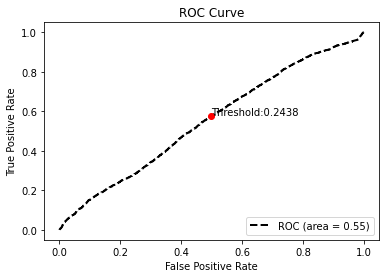

In [43]:
###最佳阈值
def Find_Optimal_Cutoff(TPR, FPR, threshold):
    y = TPR - FPR
    Youden_index = np.argmax(y)  # Only the first occurrence is returned.
    optimal_threshold = threshold[Youden_index]
    point = [FPR[Youden_index], TPR[Youden_index]]
    return optimal_threshold, point

###ROC
fpr, tpr, thersholds = roc_curve(Y_test, Y_test_pred_1, pos_label=1)
best_thershold, point = Find_Optimal_Cutoff(tpr, fpr, thersholds)
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.plot(point[0], point[1], marker='o', color='r')
plt.text(point[0], point[1], f'Threshold:{best_thershold:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [44]:
roc_auc

0.5510478410232366

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

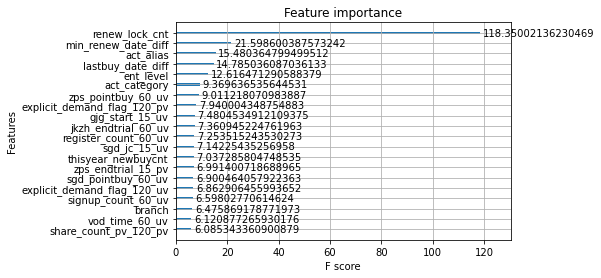

In [45]:
xgb.plot_importance(best_estimator,max_num_features=20,importance_type='gain')

In [46]:
weight = pd.Series(best_estimator.get_booster().get_score(importance_type='gain')).sort_values(ascending=False).head(20)
weight

renew_lock_cnt                 118.350021
min_renew_date_diff             21.598600
act_alias                       15.480365
lastbuy_date_diff               14.785036
ent_level                       12.616471
act_category                     9.369637
zps_pointbuy_60_uv               9.011218
explicit_demand_flag_120_pv      7.940004
gjg_start_15_uv                  7.480453
jkzh_endtrial_60_uv              7.360945
register_count_60_uv             7.253515
sgd_jc_15_uv                     7.142254
thisyear_newbuycnt               7.037286
zps_endtrial_15_pv               6.991401
sgd_pointbuy_60_uv               6.900464
explicit_demand_flag_120_uv      6.862906
signup_count_60_uv               6.598028
branch                           6.475869
vod_time_60_uv                   6.120877
share_count_pv_120_pv            6.085343
dtype: float64

[CV] END colsample_bytree=0.7133333333333334, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, subsample=0.7; total time=  23.9s
[CV] END colsample_bytree=0.7133333333333334, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, subsample=0.7; total time=  23.5s
[CV] END colsample_bytree=0.7666666666666666, learning_rate=0.020000000000000004, max_depth=9, min_child_weight=1, n_estimators=200, subsample=0.763157894736842; total time= 1.1min
[CV] END colsample_bytree=0.7133333333333334, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=100, subsample=0.9842105263157894; total time=   7.2s
[CV] END colsample_bytree=0.7133333333333334, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=100, subsample=0.9842105263157894; total time=   7.5s
[CV] END colsample_bytree=0.7133333333333334, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=100, subsample=0.9842105263157894; total time=   7.2s
[CV] END colsample_byt

In [69]:
#########
#####样本分布程度
from scipy.stats import ks_2samp
ks_2samp(train2.iloc[:,1],test2.iloc[:,1]).pvalue

5.790906765735834e-40

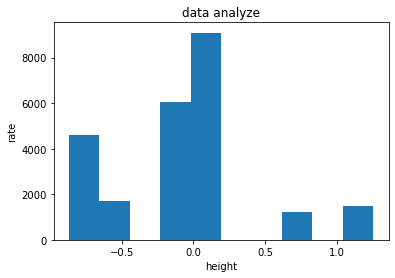

In [81]:
plt.hist(train2.iloc[:,2],bins=10)
plt.title("data analyze")
plt.xlabel("height")
plt.ylabel("rate")
 
plt.show()

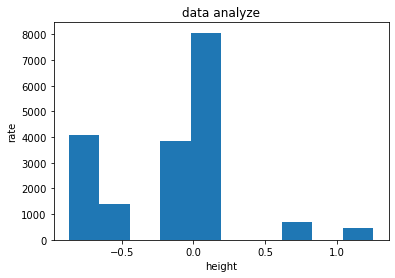

In [82]:
plt.hist(test2.iloc[:,2],bins=10)
plt.title("data analyze")
plt.xlabel("height")
plt.ylabel("rate")
 
plt.show()

In [4]:
base_data=spark.read.option("header","true").csv("/tmp/base_ad20230721.csv").toPandas()

23/07/24 01:28:10 ERROR net.ScriptBasedMapping: Script /usr/hdp/3.1.4.0-315/hadoop/conf/topology_script.py returned 1 values when 3 were expected.
23/07/24 01:28:12 WARN util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/07/24 01:28:12 ERROR net.ScriptBasedMapping: Script /usr/hdp/3.1.4.0-315/hadoop/conf/topology_script.py returned 1 values when 23 were expected.
ERROR:root:Exception while sending command.                                     
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1207, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gat

Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:45478)

In [2]:
import sys
sys.path.append('/data/gtair/tools/DWH')
from GlodonSparkSession3 import GlodonSparkSession
import os

In [3]:
spark = GlodonSparkSession().getSparkSession(log_lev='ERROR',resource_lev='high')

===============>app_name: gaokx_high_620502111
=====================>resource_lev: high


23/07/24 01:27:32 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/24 01:27:33 WARN util.Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/07/24 01:27:34 WARN shortcircuit.DomainSocketFactory: The short-circuit local reads feature cannot be used because libhadoop cannot be loaded.
23/07/24 01:27:34 WARN yarn.Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.
23/07/24 01:27:46 WARN spark.ExecutorAllocationManager: Dynamic allocation without a shuffle service is an experimental feature.
23/07/24 01:27:46 WARN cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Attempted to request executors before the AM has registered!


In [38]:
?best_estimator

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
           colsample_bylevel=1 <...> _parallel_tree=1, predictor='auto', random_state=0,
           reg_alpha=0, reg_lambda=1, ...)
File:        /opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[